In [5]:
library(readxl)
library(dplyr)
library("ggplot2")

customer_r <- read_excel("customer_r.xlsx")
reservation_r <- read_excel("reservation_r.xlsx")
order_info_r <- read_excel("order_info_r.xlsx")
item_r <- read_excel("item_r.xlsx")
colnames(customer_r) <- tolower(colnames(customer_r))
colnames(reservation_r) <- tolower(colnames(reservation_r))
colnames(order_info_r) <- tolower(colnames(order_info_r))
colnames(item_r) <- tolower(colnames(item_r))

Warning message:
"package 'readxl' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [6]:
df_rsv_customer <- reservation_r %>%
select(customer_id, reserv_no) %>%    # 고객별 모든 예약 번호 선택
    arrange(customer_id, reserv_no)

head(df_rsv_customer) 

customer_id,reserv_no
W1327595,2019061801
W1327595,2019071801
W1327803,2019060301
W1327803,2019091506
W1328432,2019060601
W1328432,2019060701


In [7]:
df_steak_order_rsv_no <- order_info_r %>% 
filter(item_id == "M0005") %>% 
mutate(steak_order = "Y") %>% 
arrange(reserv_no)

head(df_steak_order_rsv_no)

order_no,item_id,reserv_no,quantity,sales,steak_order
190603578341100100,M0005,2019060301,4,140000,Y
190606607189610010,M0005,2019060601,4,140000,Y
190616137200510010,M0005,2019061601,3,105000,Y
190708517202310010,M0005,2019070801,2,70000,Y
190710578348100100,M0005,2019071002,3,105000,Y
190718107186310010,M0005,2019071801,4,140000,Y


In [8]:
df_steak_order_1 <- left_join(df_rsv_customer, df_steak_order_rsv_no, by = "reserv_no") %>%
                    group_by(customer_id) %>%                                       
                    mutate(steak_order = ifelse(is.na(steak_order), "N", "Y")) %>%  
                    
                    summarise(steak_order = max (steak_order)) %>%       
                    arrange(customer_id)

In [9]:

df_dpd_var <- df_steak_order_1


df_dpd_var

customer_id,steak_order
W1327595,Y
W1327803,Y
W1328432,Y
W1328505,N
W1328786,N
W1328985,Y
W1328993,Y
W1329560,N
W1329954,N
W1329962,N


In [10]:
df_customer <- customer_r %>% filter(!is.na(sex_code))

In [11]:
df_table_join_1 <- inner_join(df_customer, reservation_r, by = "customer_id")

In [12]:
df_table_join_2 <- inner_join(df_table_join_1, order_info_r, by = "reserv_no")
str(df_table_join_2) 

tibble [322 x 19] (S3: tbl_df/tbl/data.frame)
 $ customer_id   : chr [1:322] "W1346506" "W1347648" "W1347756" "W1347984" ...
 $ customer_name : chr [1:322] "고객71" "고객72" "고객73" "고객74" ...
 $ phone_number  : chr [1:322] "010-1111-1181" "010-1111-1182" "010-1111-1183" "010-1111-1184" ...
 $ email         : chr [1:322] "scust71@sfnb.co.kr" "scust72@sfnb.co.kr" "scust73@sfnb.co.kr" "scust74@sfnb.co.kr" ...
 $ first_reg_date: chr [1:322] "19/09/01" "19/09/04" "19/09/05" "19/09/06" ...
 $ sex_code      : chr [1:322] "F" "M" "M" "M" ...
 $ birth         : chr [1:322] "19820922" "19940812" "19931217" "19810822" ...
 $ job           : chr [1:322] "자영업" "학생" NA "자영업" ...
 $ zip_code      : chr [1:322] "122100" "140100" "152100" "130100" ...
 $ reserv_no     : chr [1:322] "2019102002" "2019092301" "2019111301" "2019120201" ...
 $ reserv_date   : chr [1:322] "20191020" "20190923" "20191113" "20191202" ...
 $ reserv_time   : chr [1:322] "1800" "1800" "1200" "1200" ...
 $ branch        : chr [1:322]

In [13]:
df_table_join_3 <- df_table_join_2 %>%
    group_by(customer_id, sex_code, reserv_no, visitor_cnt) %>% # ⓐ
    summarise(sales_sum = sum(sales)) %>%
    group_by(customer_id, sex_code) %>%                         # ⓑ
    summarise(visit_sum = n_distinct(reserv_no), visitor_sum = sum(visitor_cnt), sales_sum = sum(sales_sum) / 1000) %>%     # ⓒ
    arrange(customer_id)

df_idp_var <- df_table_join_3

df_idp_var        

`summarise()` has grouped output by 'customer_id', 'sex_code', 'reserv_no'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'customer_id'. You can override using the `.groups` argument.


customer_id,sex_code,visit_sum,visitor_sum,sales_sum
W1327595,M,2,6,188
W1327803,M,2,6,210
W1328432,M,3,12,246
W1328505,F,5,15,287
W1328786,M,1,1,10
W1328985,M,2,6,178
W1328993,F,1,4,140
W1329560,M,1,2,24
W1329954,M,1,2,48
W1329962,M,2,4,48


In [14]:
df_final_data <- inner_join(df_idp_var, df_dpd_var, by = "customer_id")


df_final_data$sex_code <- as.factor(df_final_data$sex_code)
df_final_data$steak_order <- as.factor(df_final_data$steak_order)

df_final_data <- df_final_data[, c(2:6)]   
df_final_data                     

sex_code,visit_sum,visitor_sum,sales_sum,steak_order
M,2,6,188,Y
M,2,6,210,Y
M,3,12,246,Y
F,5,15,287,N
M,1,1,10,N
M,2,6,178,Y
F,1,4,140,Y
M,1,2,24,N
M,1,2,48,N
M,2,4,48,N


In [15]:
install.packages("installr")

package 'installr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Public\Documents\ESTsoft\CreatorTemp\RtmpCQJa3X\downloaded_packages


In [32]:
library(installr)

Warning message:
"package 'installr' was built under R version 3.6.3"Loading required package: stringr

Welcome to installr version 0.22.0

More information is available on the installr project website:
https://github.com/talgalili/installr/

Contact: <tal.galili@gmail.com>
Suggestions and bug-reports can be submitted at: https://github.com/talgalili/installr/issues

			To suppress this message use:
			suppressPackageStartupMessages(library(installr))



In [33]:
install.packages("stringr")

Warning message:
"package 'stringr' is in use and will not be installed"

In [34]:
library(stringr)

In [35]:
install.R()


The file was downloaded successfully into:
 C:\Users\Public\Documents\ESTsoft\CreatorTemp\RtmpmKX8wB/R-4.0.4-win.exe 

Running the installer now...

Installation status:  TRUE . Removing the file:
 C:\Users\Public\Documents\ESTsoft\CreatorTemp\RtmpmKX8wB/R-4.0.4-win.exe 
 (In the future, you may keep the file by setting keep_install_file=TRUE) 


ERROR: Error in if (!pass_checkMD5sums) {: TRUE/FALSE가 필요한 곳에 값이 없습니다


In [2]:
package_version(R.version)

[1] '3.6.1'

In [16]:
install.packages("rpart")
install.packages("caret")
install.packages("e1071")

library(rpart)
library(caret)
library(e1071)

package 'rpart' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Public\Documents\ESTsoft\CreatorTemp\RtmpCQJa3X\downloaded_packages
package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Public\Documents\ESTsoft\CreatorTemp\RtmpCQJa3X\downloaded_packages
package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Public\Documents\ESTsoft\CreatorTemp\RtmpCQJa3X\downloaded_packages


Warning message:
"package 'rpart' was built under R version 3.6.3"Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'e1071' was built under R version 3.6.3"

In [29]:
set.seed(10000)

# 80% 데이터는 train을 위해 준비하고, 20% 데이터는 test를 위해 준비함
train_data <- createDataPartition(y = df_final_data$steak_order, p = 0.8, list = FALSE)
train <- df_final_data[train_data, ]
test <- df_final_data[-train_data, ]

# rpart를 사용해서 의사 결정 나무 생성
decision_tree <- rpart(steak_order~., data = train)

# decision_tree 내용 확인
decision_tree


n= 115 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 115 44 N (0.61739130 0.38260870)  
   2) sales_sum< 55.5 37  2 N (0.94594595 0.05405405) *
   3) sales_sum>=55.5 78 36 Y (0.46153846 0.53846154)  
     6) sales_sum< 173 45 18 N (0.60000000 0.40000000)  
      12) visitor_sum>=5.5 19  1 N (0.94736842 0.05263158) *
      13) visitor_sum< 5.5 26  9 Y (0.34615385 0.65384615) *
     7) sales_sum>=173 33  9 Y (0.27272727 0.72727273)  
      14) visit_sum< 1.5 9  4 N (0.55555556 0.44444444) *
      15) visit_sum>=1.5 24  4 Y (0.16666667 0.83333333) *

In [30]:
predicted <- predict(decision_tree, test, type = 'class')
confusionMatrix(predicted, test$steak_order)


Confusion Matrix and Statistics

          Reference
Prediction  N  Y
         N 14  1
         Y  3  9
                                          
               Accuracy : 0.8519          
                 95% CI : (0.6627, 0.9581)
    No Information Rate : 0.6296          
    P-Value [Acc > NIR] : 0.01066         
                                          
                  Kappa : 0.6949          
                                          
 Mcnemar's Test P-Value : 0.61708         
                                          
            Sensitivity : 0.8235          
            Specificity : 0.9000          
         Pos Pred Value : 0.9333          
         Neg Pred Value : 0.7500          
             Prevalence : 0.6296          
         Detection Rate : 0.5185          
   Detection Prevalence : 0.5556          
      Balanced Accuracy : 0.8618          
                                          
       'Positive' Class : N               
                                    

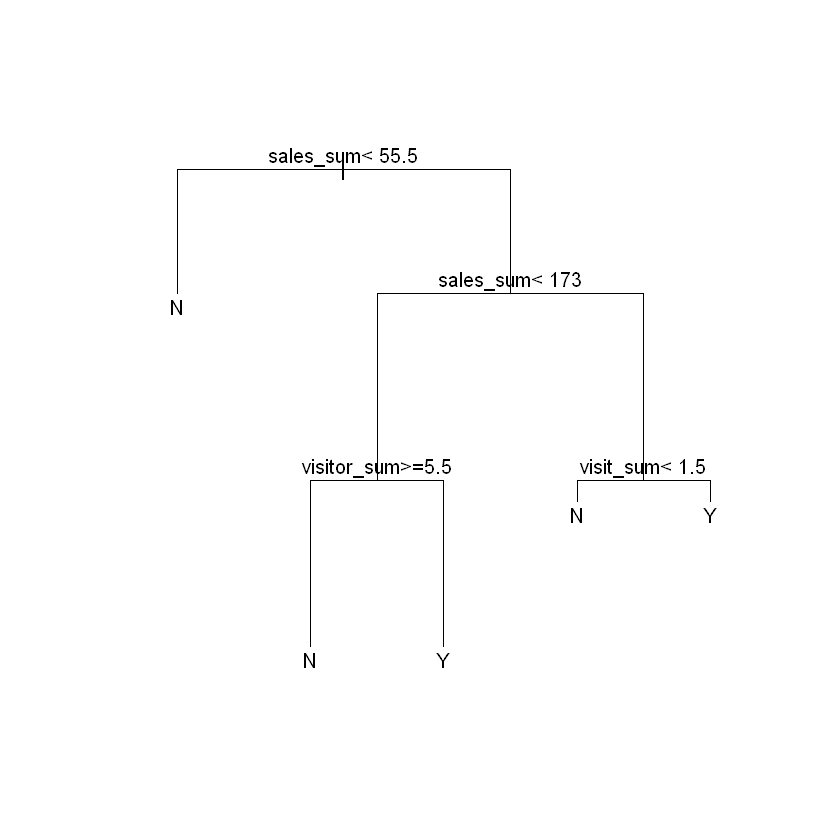

In [31]:
plot(decision_tree, margin = 0.1)   # 의사 결정 나무 그리기
text(decision_tree)    

In [32]:
install.packages("rattle")  # 패키지 설치

library(rattle)       

Warning message:
"package 'rattle' is in use and will not be installed"

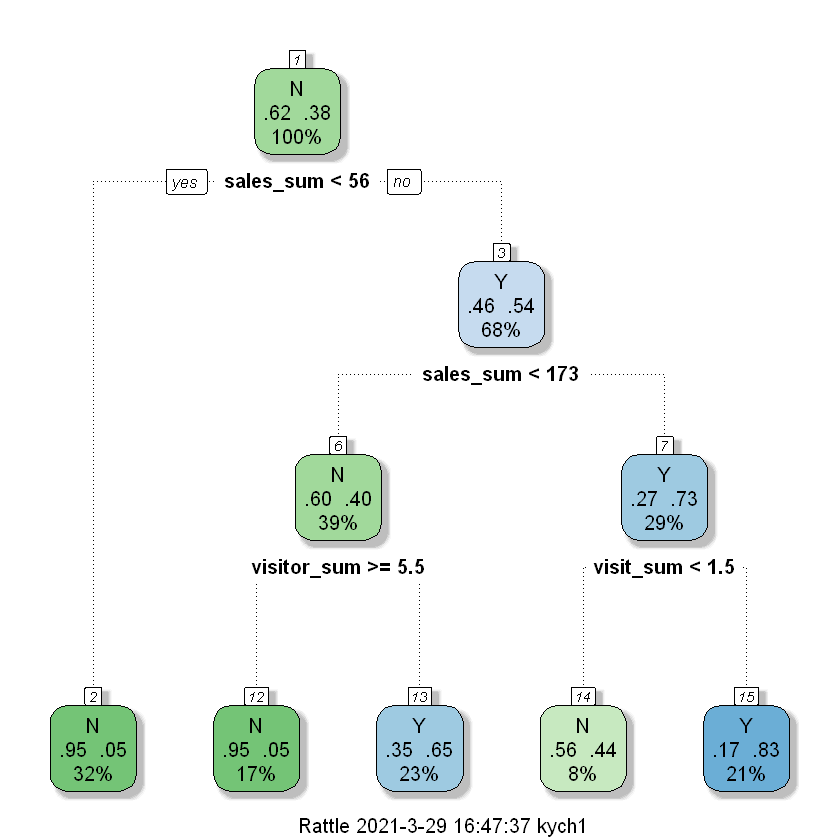

In [33]:
fancyRpartPlot(decision_tree) 